In [1]:
!pip install qrcode[pil] opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 684.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.1 MB/s eta 0:00:00


In [2]:
%cd '/content/drive/MyDrive/QRcode_Identification/Sample QR codes'

/content/drive/MyDrive/QRcode_Identification/Sample QR codes


In [3]:
import qrcode
import cv2
from datetime import datetime, timedelta
import time

# Generate QR Code
def generate_qr_code(data, file_name):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white")
    img.save(file_name)

# Decode QR Code
def decode_qr_code(file_name):
    img = cv2.imread(file_name)
    detector = cv2.QRCodeDetector()
    data, bbox, _ = detector.detectAndDecode(img)
    if bbox is not None:
        print("QR Code detected!")
        return data
    else:
        print("QR Code not detected!")
        return None

for i in range(50,60):
    item_name = "Example Item"
    manufacturing_date = datetime.now().strftime("%Y-%m-%d")[2:]
    expiry_date = (datetime.now() + timedelta(days=210+i*3)).strftime("%Y-%m-%d")[2:]
    weight = "0.6"
    batch_number = str(45+i*3)

    # Concatenate data into a single string
    qr_data = f"{i+6}{manufacturing_date}{expiry_date}{weight} {batch_number}"

    # Generate QR code
    generate_qr_code(qr_data, f"example{i}.png")
    #print("QR Code generated.")

In [ ]:
import cv2
img = cv2.imread('example3.png')
detector = cv2.QRCodeDetector()
data, bbox, _ = detector.detectAndDecode(img)
if bbox is not None:
    print("QR Code detected!")
    print(data)
else:
    print("QR Code not detected!")
    print(data)

QR Code detected!
5524-05-0125-05-010.6 45


[[ 40.  40.]
 [249.  40.]
 [249. 249.]
 [ 40. 249.]]


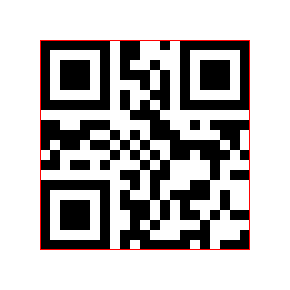

In [ ]:
from google.colab.patches import cv2_imshow
box = bbox[0]
print(box)
img1 = cv2.rectangle(img,(int(box[0][0]), int(box[0][1])), (int(box[2][0]),int(box[2][1])), (0,0,255), 1)
cv2_imshow(img1)

In [ ]:
!pip uninstall qrcode
!pip install qrcode[pil]==7.4

Found existing installation: qrcode 7.4.2
Uninstalling qrcode-7.4.2:
  Would remove:
    /usr/local/bin/qr
    /usr/local/lib/python3.10/dist-packages/qrcode-7.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/qrcode/*
    /usr/local/share/man/man1/qr.1
Proceed (Y/n)? y
  Successfully uninstalled qrcode-7.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.9 MB/s eta 0:00:00
Reason for being yanked: Broken for qrcodes >= size 8


In [ ]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers.pil import RoundedModuleDrawer, HorizontalBarsDrawer, VerticalBarsDrawer, GappedSquareModuleDrawer, CircleModuleDrawer, SquareModuleDrawer
from qrcode.image.styles.colormasks import RadialGradiantColorMask
from datetime import datetime, timedelta
import time

manufacturing_date = datetime.now().strftime("%Y-%m-%d")[2:]
expiry_date = (datetime.now() + timedelta(days=365)).strftime("%Y-%m-%d")[2:]
sno = "128"
batch_number = "45"

# Concatenate data into a single string
data = f"55{manufacturing_date}{expiry_date}{sno} {batch_number}"

# Define the error correction level
error_correction = qrcode.constants.ERROR_CORRECT_H

# Create QR code instance
qr = qrcode.QRCode(error_correction=error_correction)
qr.add_data(data)

# Define all module drawers
module_drawers = [
    HorizontalBarsDrawer(),
    VerticalBarsDrawer(),
    GappedSquareModuleDrawer(),
    CircleModuleDrawer(),
    SquareModuleDrawer(),
    RoundedModuleDrawer()
]

# Save the QR code image in each style
for i, module_drawer in enumerate(module_drawers):
    img = qr.make_image(image_factory=StyledPilImage, module_drawer=module_drawer)
    filename = f"qr_code_style_{i+1}.png"
    with open(filename, 'wb') as f:
        img.save(f)
    print(f"QR code with style {i+1} saved as {filename}")

QR code with style 1 saved as qr_code_style_1.png
QR code with style 2 saved as qr_code_style_2.png
QR code with style 3 saved as qr_code_style_3.png
QR code with style 4 saved as qr_code_style_4.png
QR code with style 5 saved as qr_code_style_5.png
QR code with style 6 saved as qr_code_style_6.png


In [ ]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers.pil import RoundedModuleDrawer, HorizontalBarsDrawer, VerticalBarsDrawer, GappedSquareModuleDrawer, CircleModuleDrawer, SquareModuleDrawer
from qrcode.image.styles.colormasks import RadialGradiantColorMask

qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)
qr.add_data('Some data')

img_1 = qr.make_image(image_factory=StyledPilImage, module_drawer=HorizontalBarsDrawer())
with open('rough.png', 'wb') as f:
    img_1.save(f)